In [42]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from main import get_data,explore_data

In [43]:
def get_cohort_sizes(data: DataFrame) -> list[int]:
    # Return the number of unique user values for each cohort
    cohort_sizes = data.groupby('cohort ')["user  "].nunique()
    return cohort_sizes

def get_customer_base_sizes(data: DataFrame) -> list[int]:
    customer_base_sizes = data.groupby('time_month ')["user  "].nunique()
    return customer_base_sizes

In [44]:
data = get_data()

In [52]:
# Takes list with 12 integer values and plots these in a histogram
def plot_new_users(data: list[int]):
    t = np.linspace(0,11,12)
    plt.figure(figsize=(12,6))
    bars = plt.bar(t, data, tick_label=["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"])

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

    plt.xlabel("Month")
    plt.ylabel("New users")
    plt.show()


# 2a

Two different methods used here:

### 1. Sum over all unique user values for each cohort

### 2. Return the largest value for user and add 1 since the user values start at 0

In [53]:
print(np.sum(get_cohort_sizes(data))) 

max_user_number = get_data()["user  "].max() + 1
print(max_user_number)

20332
20332


# 2b

```get_cohort_sizes``` returns the number of unique user values for each cohort

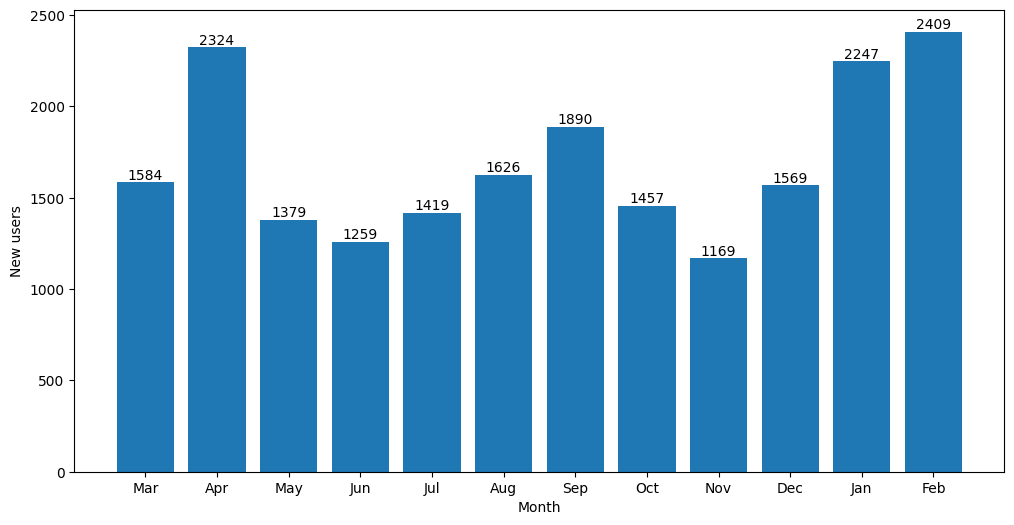

In [54]:
plot_new_users(get_cohort_sizes(data))

# 2c
In the number of new users acquired in each month, we see some periodic behavior throughout the year with local maxima in April, September and February and local minima in March, June and November. One interpretation of the maxima is that new users register when they want some sort of entertainment, as Netflix provides. And so this means that not much else entertaining is happening in these times or maybe life is not as busy. One could indeed argue that September, February and April is in the off-season at least for exams at schools and universities and people are traveling less these months. Meanwhile we see that the summer months May, June and July are stable low and together make 3 of the bottom 4 months

# 2d

In this task we group the dataset by the month and not cohort, and then find the number of unique user values for each of those months

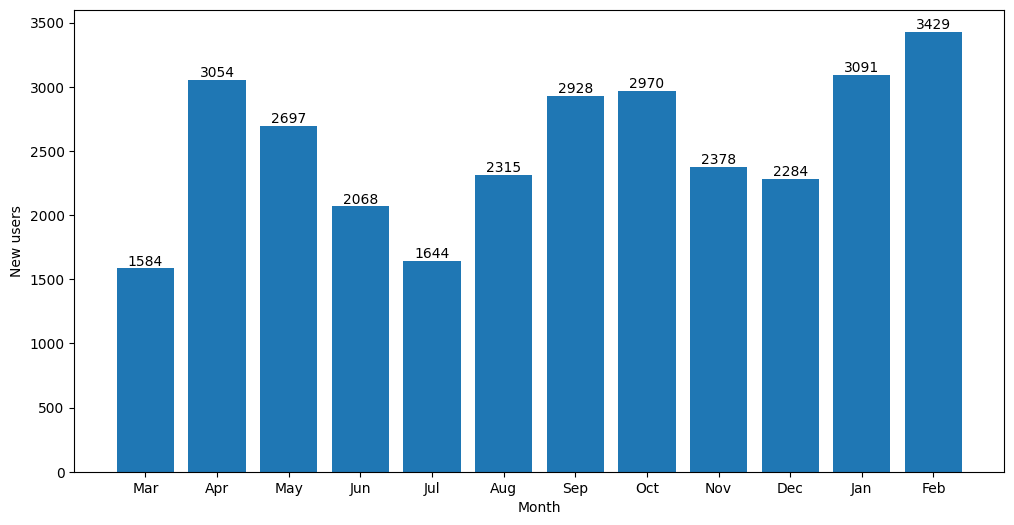

In [55]:
plot_new_users(get_customer_base_sizes(data))


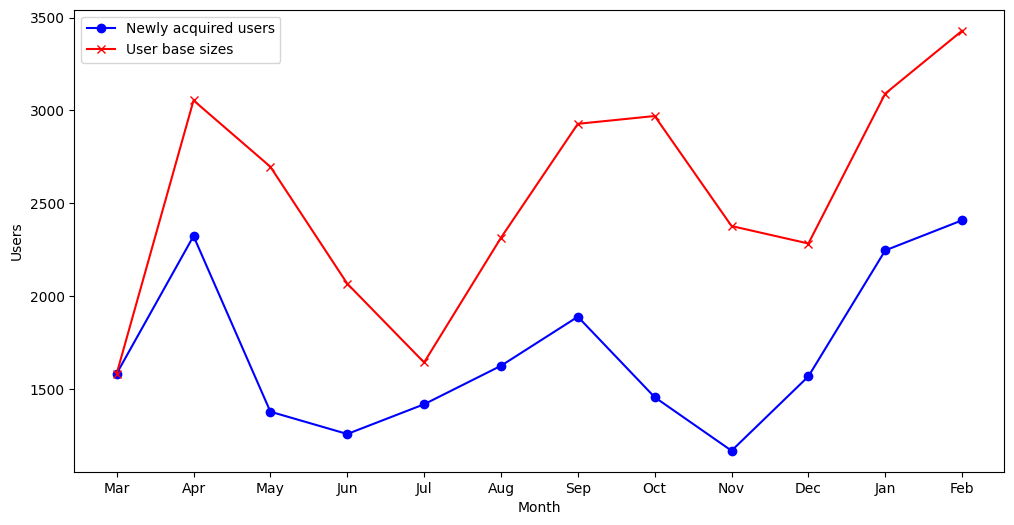

In [59]:
def plot_two_lines(data1: list[int], data2: list[int], label1: str, label2: str):
    t = np.linspace(0,11,12)
    months = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"]
    plt.figure(figsize=(12,6))
    plt.plot(t, data1, label=label1, color="blue", marker="o")
    plt.plot(t, data2, label=label2, color="red", marker="x")
    plt.xlabel("Month")
    plt.xticks(t, months)
    plt.ylabel("Users")
    plt.legend()
    plt.show()

plot_two_lines(get_cohort_sizes(data), get_customer_base_sizes(data), "Newly acquired users", "User base sizes")


# 2e

The periodicity for the user base size is similar for the newly acquired users and many arguments can be reapplied. However are some differences: 
- From June-July we see that the user base size decreases a lot, while the number of newly acquired users actually grow in this shift of month
- From November-December we see the same pattern. The User base size decreases, but the number of new users increases
